All the information on how to use the Statmorph library can be found at https://statmorph.readthedocs.io/en/latest/

# Import

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm
import photutils
import time
import statmorph
import scipy.ndimage as ndi
from astropy.convolution import convolve
from astropy.table import Table
from astropy.table import Column
from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import SourceCatalog
from astropy.io import ascii

## Generate a PSF

A use a simple Gaussian PSF with a FWHM of 0.77 arcsec (or 3.7 pixels)

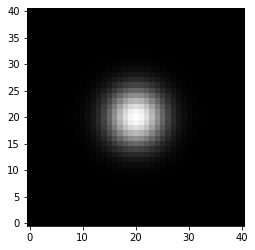

In [2]:
size = 20  # on each side from the center
sigma_psf = 3.7 #FWHM KiDS is 0.77 arcsec
y, x = np.mgrid[-size:size+1, -size:size+1]
psf = np.exp(-(x**2 + y**2)/(2.0*sigma_psf**2))
psf /= np.sum(psf)

plt.imshow(psf, origin='lower', cmap='gray')
plt.show()

In [3]:
gain = 3

In [4]:
from os import listdir

directory = './downloaded_data/'
file_names = [f for f in listdir(directory)]
print(file_names)

['ILTJ155957.58+550052.4.fits', 'ILTJ155958.25+550105.3.fits', 'ILTJ155958.68+550534.6.fits', 'ILTJ155959.52+545751.0.fits', 'ILTJ160000.65+550723.3.fits', 'ILTJ160001.30+550713.3.fits', 'ILTJ160002.20+550250.3.fits', 'ILTJ160002.69+545540.6.fits', 'ILTJ160003.36+544826.6.fits', 'ILTJ160003.85+545546.8.fits', 'ILTJ160004.10+551112.8.fits', 'ILTJ160004.30+550429.7.fits', 'ILTJ160004.96+551255.5.fits', 'ILTJ160004.97+550437.9.fits', 'ILTJ160005.14+545029.2.fits', 'ILTJ160005.47+545534.8.fits', 'ILTJ160005.72+544939.4.fits', 'ILTJ160005.87+550522.9.fits', 'ILTJ160006.48+544831.6.fits', 'ILTJ160006.49+550747.8.fits', 'ILTJ160006.73+544333.5.fits', 'ILTJ160006.74+550651.5.fits', 'ILTJ160006.84+550539.7.fits', 'ILTJ160007.11+550434.3.fits', 'ILTJ160007.27+545349.9.fits', 'ILTJ160007.49+551057.0.fits', 'ILTJ160007.76+550801.4.fits', 'ILTJ160007.81+544344.9.fits', 'ILTJ160007.87+550730.8.fits', 'ILTJ160007.89+545116.3.fits', 'ILTJ160008.18+545132.1.fits', 'ILTJ160008.32+545236.9.fits', 'ILTJ16

### Run Statmorph on a batch of images and save the parameters in a table

In [5]:
import tqdm
from multiprocessing import Pool
from workers import worker

if __name__ ==  '__main__':
    rows = []

    pool = Pool(processes=8)
    for x in tqdm.tqdm(pool.imap_unordered(worker, file_names), total=len(file_names)):
        rows.append(x)

100%|██████████████████████████████████████████████████████████████████████████| 30225/30225 [1:05:01<00:00,  7.75it/s]


In [21]:
rows_clean = [i for i in rows if isinstance(i, list)]
rows_problem = [i for i in rows if isinstance(i, str)]

In [28]:
col_names = ('ID','xc_centroid','yc_centroid', 'ellipticity_centroid', 'elongation_centroid', 'orientation_centroid',
         'xc_asymmetry', 'yc_asymmetry','ellipticity_asymmetry', 'elongation_asymmetry', 'orientation_asymmetry',
         'r20','r50','r80','rhalf_circ','rhalf_ellip','rmax_circ','rmax_ellip','rpetro_circ','rpetro_ellip',
         'C','A','S','M20','Gini', 'F(G,M20)', 'S(G,M20)', 'deviation', 'shape_asymmetry','outer_asymmetry',
         'multimode','sn_per_pixel','flux_circ','flux_ellip','intensity',
         'sersic_xc','sersic_yc','sersic_amplitude', 'sersic_ellip','sersic_n','sersic_rhalf','sersic_theta',
         'sky_mean','sky_median','sky_sigma',
         'nx_stamp','ny_stamp','xmax_stamp','xmin_stamp','ymax_stamp','ymin_stamp',
        'flag', 'flag_sersic'
        )

t = Table(names=col_names)
t['ID'] = Column(name='ID', dtype='str')

In [29]:
for row in rows_clean:
    t.add_row(row)

In [40]:
ascii.write(t, 'statmorph.dat', overwrite=True)

In [43]:
np.savetxt("problem_rows.txt", rows_problem, delimiter=",", fmt="%s") 